In [1]:
from numba import njit
from numba_kdtree import KDTree
import numpy as np
import arepo
import matplotlib.pyplot as plt
import h5py as h5
import matplotlib as mpl

from tqdm import tqdm_notebook as tqdm

In [2]:
sim_list = ['Nbody', 'phantom-vacuum-Sg20-Rc3.5']

basepath = '/n/holystore01/LABS/hernquist_lab/Users/abeane/starbar_runs/runs/'

def read_snap(idx, sim_idx, lvl='lvl3', parttype=None, 
              fields=['Coordinates', 'Masses', 'Velocities', 'Acceleration'],
              basepath = basepath):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output'
    return arepo.Snapshot(fname, idx, parttype=parttype, fields=fields, combineFiles=True)

In [3]:
bprop_path = '/n/home01/abeane/starbar/plots/bar_prop/data/'

def fix_bar_angle(bar_angle):
    out = np.zeros(len(bar_angle))
    out[0] = bar_angle[0]

    for i in range(1, len(bar_angle)):
        dphi = bar_angle[i] - bar_angle[i-1]
        if dphi < -np.pi:
            dphi += 2.*np.pi
        
        out[i] = out[i-1] + dphi
    
    return out

def read_bar_angle(name, lvl):
    t = h5.File(bprop_path + 'bar_prop_' + name + '-' + lvl + '.hdf5', mode='r')
    out = t['bar_angle'][:]
    tlist = t['tlist'][:]
    print(t.keys())
    t.close()
    
    fixed = fix_bar_angle(out)
    ps = np.gradient(fixed, tlist)

    return out, ps

In [98]:
sn = read_snap(500, 1, parttype=1, fields=['Coordinates', 'Masses', 'Velocities', 'Acceleration', 'Potential'])
center = np.array([200., 200., 200.])

In [99]:
pos = sn.part1.pos.value - center
vel = sn.part1.vel.value
pot = sn.part1.pot.value

r = np.linalg.norm(pos, axis=1)

E = 0.5 * np.linalg.norm(vel, axis=1) + pot
Lz = np.cross(pos, vel)[:,2]
L = np.linalg.norm(np.cross(pos, vel), axis=1)

/n/helmod/apps/centos7/Core/Anaconda3/5.0.1-fasrc02/x/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/n/helmod/apps/centos7/Core/Anaconda3/5.0.1-fasrc02/x/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


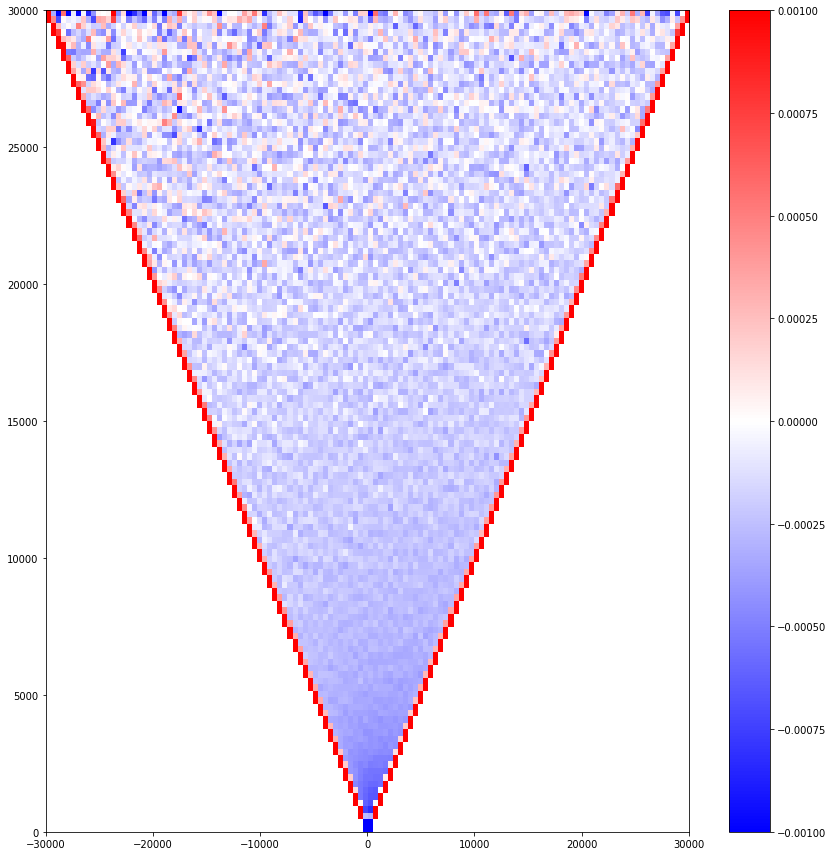

In [45]:
nres = 128

range_xy = [[-3E4, 3E4], [0, 3E4]]

x = Lz
y = L
heatmap_xy, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy)

dx = (range_xy[0][1]-range_xy[0][0])/nres
dy = (range_xy[1][1]-range_xy[1][0])/nres

grad = np.gradient(heatmap_xy, dx, dy)
grad_CR = grad[1]
grad_norm = np.linalg.norm(grad, axis=0)

extent = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# im = ax.imshow(heatmap_xy.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())#, vmin=-0.2, vmax=0.2)#, vmin=-50000, vmax=50000)
im = ax.imshow(grad_CR.T/heatmap_xy.T, extent=extent, origin='lower', cmap='bwr', vmin=-0.001, vmax=0.001)#, vmin=-2, vmax=2)#, vmin=-0.2, vmax=0.2)#, vmin=-50000, vmax=50000)
ax.set_aspect('auto')
fig.colorbar(im)

fig.tight_layout()

plt.show()


In [73]:
nres = 256

range_xy = [[-3E4, 3E4], [0, 3E4]]

x = Lz
y = L
heatmap_xy, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy)

dx = (range_xy[0][1]-range_xy[0][0])/nres
dy = (range_xy[1][1]-range_xy[1][0])/nres

grad = np.gradient(heatmap_xy, dx, dy)
grad_CR = grad[0]

grad_CR_int = np.trapz(grad[0], dx=dy, axis=1)


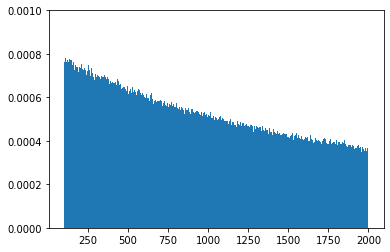

In [126]:
n, bins, _ = plt.hist(Lz, bins=np.linspace(100, 2000, 2000), density=True)
plt.ylim(0, 0.001)
plt.show()

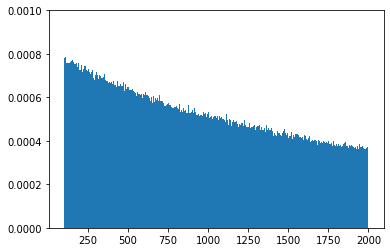

In [124]:
n, bins, _ = plt.hist(Lz_N, bins=np.linspace(100, 2000, 2000), density=True)
plt.ylim(0, 0.001)
plt.show()

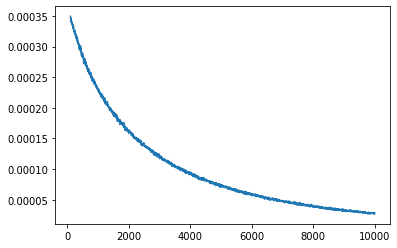

In [119]:
xbins = (bins[0:-1] + bins[1:])/2.0
plt.plot(xbins, n)
plt.show()

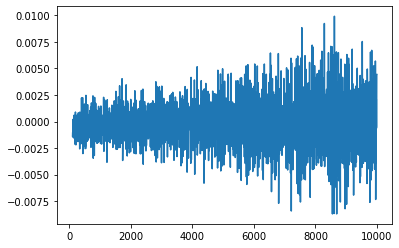

In [118]:
xbins = (bins[0:-1] + bins[1:])/2.0
dndLz = np.gradient(n, xbins)
plt.plot(xbins, dndLz/n)
# plt.yscale('symlog')
plt.show()

In [48]:
snN = read_snap(500, 0, parttype=1, fields=['Coordinates', 'Masses', 'Velocities', 'Acceleration', 'Potential'])
center = np.array([0., 0., 0.])

In [49]:
pos = snN.part1.pos.value - center
vel = snN.part1.vel.value
pot = snN.part1.pot.value

r = np.linalg.norm(pos, axis=1)

E_N = 0.5 * np.linalg.norm(vel, axis=1) + pot
Lz_N = np.cross(pos, vel)[:,2]
L_N = np.linalg.norm(np.cross(pos, vel), axis=1)

/n/helmod/apps/centos7/Core/Anaconda3/5.0.1-fasrc02/x/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/n/helmod/apps/centos7/Core/Anaconda3/5.0.1-fasrc02/x/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


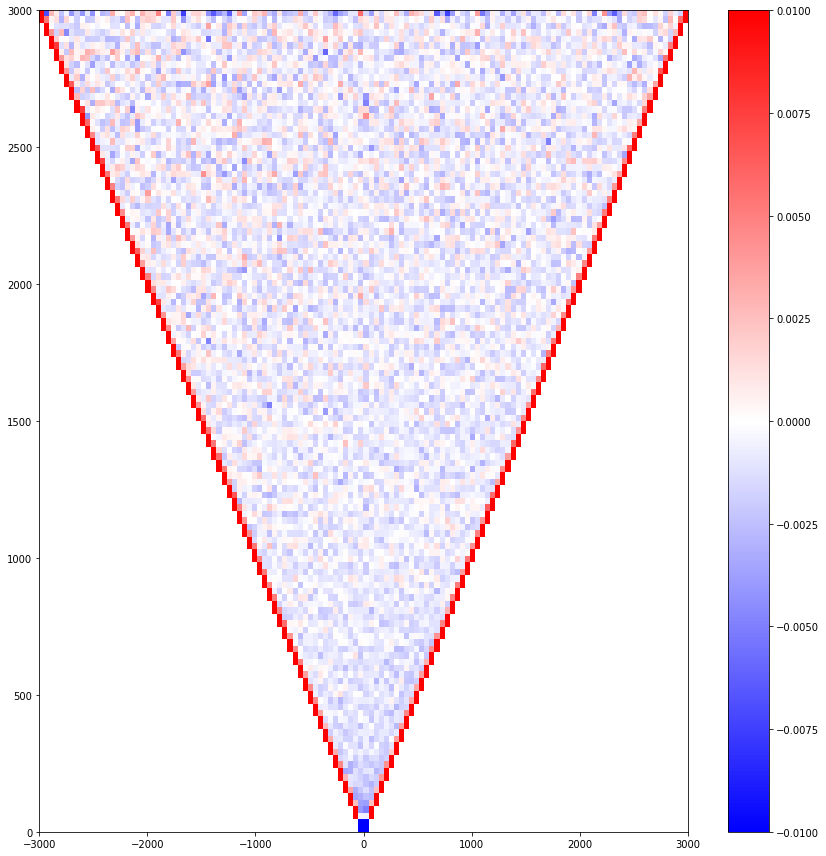

In [50]:
nres = 128

range_xy = [[-3E3, 3E3], [0, 3E3]]

x = Lz_N
y = L_N
heatmap_xy, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy)

dx = (range_xy[0][1]-range_xy[0][0])/nres
dy = (range_xy[1][1]-range_xy[1][0])/nres

grad = np.gradient(heatmap_xy, dx, dy)
grad_CR = grad[1]
grad_norm = np.linalg.norm(grad, axis=0)

extent = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# im = ax.imshow(heatmap_xy.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())#, vmin=-0.2, vmax=0.2)#, vmin=-50000, vmax=50000)
im = ax.imshow(grad_CR.T/heatmap_xy.T, extent=extent, origin='lower', cmap='bwr', vmin=-0.01, vmax=0.01)#, vmin=-2, vmax=2)#, vmin=-0.2, vmax=0.2)#, vmin=-50000, vmax=50000)
ax.set_aspect('auto')
fig.colorbar(im)

fig.tight_layout()

plt.show()


In [56]:
nres = 256

range_xy = [[-3E4, 3E4], [0, 3E4]]

x = Lz_N
y = L_N
heatmap_xy, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy)

dx = (range_xy[0][1]-range_xy[0][0])/nres
dy = (range_xy[1][1]-range_xy[1][0])/nres

grad = np.gradient(heatmap_xy, dx, dy)
grad_CR = grad[0]

grad_CR_int = np.trapz(grad[0], dx=dy, axis=1)
print(grad_CR_int[:10])

[24.    25.    24.25  21.    24.875 28.75  34.875 37.375 34.375 24.875]


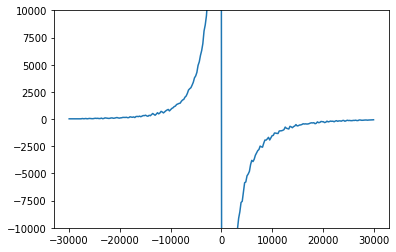

In [59]:
plt.plot(np.linspace(range_xy[0][0], range_xy[0][1], nres), grad_CR_int)
plt.ylim(-10000, 10000)
plt.show()

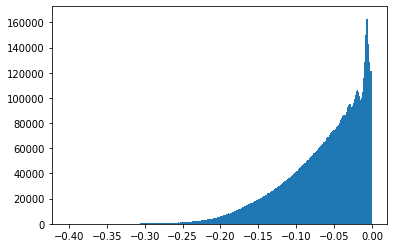

In [12]:
plt.hist(E/1E6, bins=1000)

# plt.xlim(-1E4, 1E4)
plt.show()

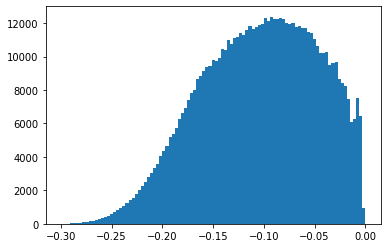

In [18]:
Lzmid = 500
dLz = 200
key = np.logical_and(Lz > Lzmid - dLz/2., Lz < Lzmid + dLz/2.)
plt.hist(E[key]/1E6, bins=np.linspace(-0.3, 0, 100))
# plt.yscale('log')
plt.show()

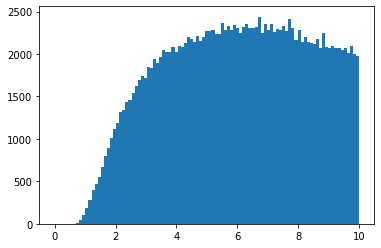

In [21]:
plt.hist(r[key], bins=np.linspace(0, 10, 100))
plt.show()

In [ ]:
# plt.hist(Lz, bins=np.linspace(10, 4*100*10, 1000))
# plt.yscale('log')
plt.show()

In [51]:
key = np.abs(E/1E6 + 0.2) < 0.001

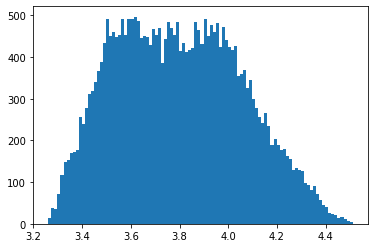

In [52]:
plt.hist(r[key], bins=100)
plt.show()

In [28]:
sn = read_snap(900, 1, parttype=1, fields=['Coordinates', 'Masses', 'Velocities', 'Acceleration', 'Potential'])
center = np.array([200., 200., 200.])

In [29]:
pos = sn.part1.pos.value - center
vel = sn.part1.vel.value
pot = sn.part1.pot.value

E = 0.5 * np.linalg.norm(vel, axis=1) + pot

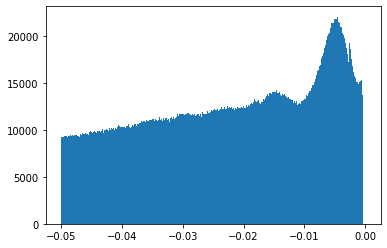

In [30]:
plt.hist(E/1E6, bins=np.linspace(-0.05, 0, 1000))
# plt.yscale('log')
plt.show()

## Time averaging

In [4]:
# read in the bar position
idx_list = np.arange(480, 520)
print(len(idx_list))
center = np.array([200., 200., 200.])

Lz_ave = []
E_ave = []

for i,idx in enumerate(tqdm(idx_list)):
    sn = read_snap(idx, 1, parttype=1, fields=['Coordinates', 'Velocities', 'Potential', 'ParticleIDs'])
    
    key_sort = np.argsort(sn.part1.id)
    pos = sn.part1.pos.value - center
    vel = sn.part1.vel.value
    pot = sn.part1.pot.value
    
    pos = pos[key_sort]
    vel = vel[key_sort]
    pot = pot[key_sort]
    
    Lz = np.cross(pos, vel)[:,2]
    E = 0.5 * np.linalg.norm(vel, axis=1)**2 + pot
    
    if i==0:
        Lz_ave = Lz
        E_ave = E
    else:
        Lz_ave += Lz
        E_ave += E

Lz_ave /= len(idx_list)
E_ave /= len(idx_list)
    

40


A Jupyter Widget

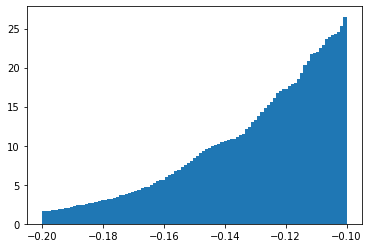

In [6]:
plt.hist(E_ave/1E6, bins=np.linspace(-0.2, -0.1, 100), density=True)
# plt.yscale('log')
# plt.ylim(2, 7)
plt.show()

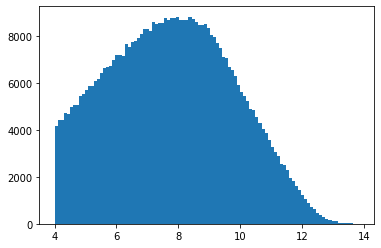

In [13]:
r = np.linalg.norm(pos, axis=1)
key = np.abs(E_ave/1E6 + 0.14) < 0.01
key = np.logical_and(key, r > 4)
plt.hist(r[key], bins=100)
plt.show()

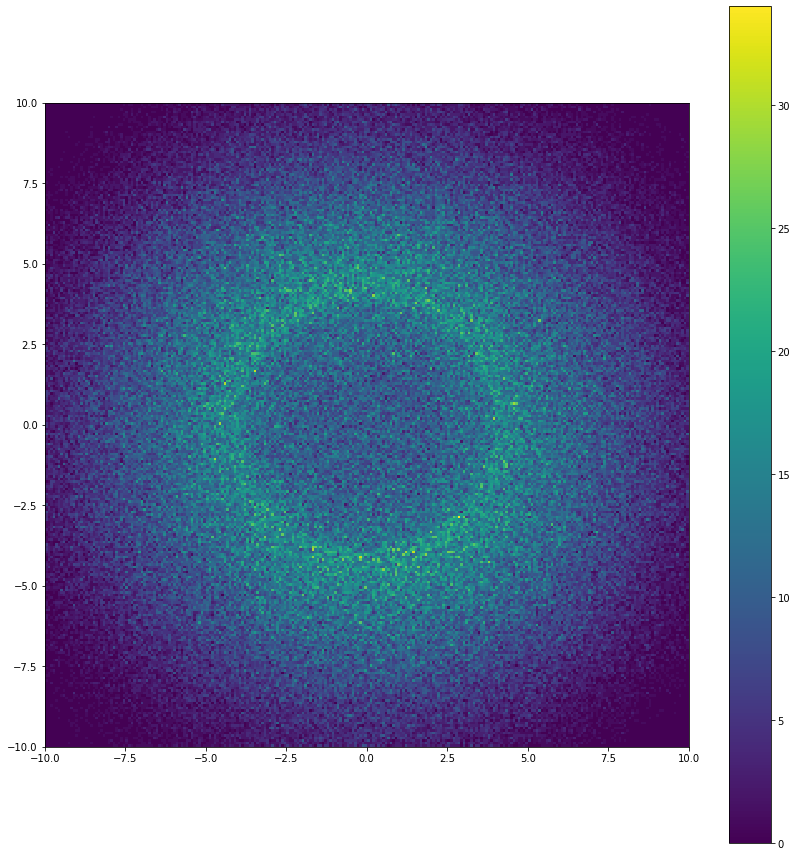

In [14]:
nres = 256

range_xy = [[-10, 10], [-10, 10]]

x = pos[key][:,0]
y = pos[key][:,1]
heatmap_xy, _, _ = np.histogram2d(x, y, bins=(nres, nres), range=range_xy)

extent = [range_xy[0][0], range_xy[0][1], range_xy[1][0], range_xy[1][1]]

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

im = ax.imshow(heatmap_xy.T, extent=extent, origin='lower')#, vmin=-0.2, vmax=0.2)#, vmin=-50000, vmax=50000)
ax.set_aspect('equal')
fig.colorbar(im)

fig.tight_layout()

plt.show()


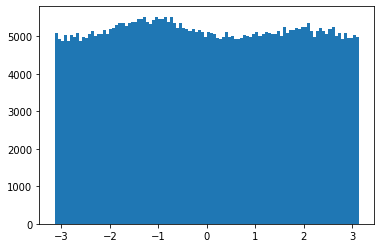

In [15]:
phi = np.arctan2(pos[key][:,1], pos[key][:,0])
plt.hist(phi, bins=100)
plt.show()

In [16]:
# read in the bar position
idx_list = np.arange(890,910)
print(len(idx_list))
center = np.array([200., 200., 200.])

Lz_ave = []
E_ave = []

for i,idx in enumerate(tqdm(idx_list)):
    sn = read_snap(idx, 1, parttype=1, fields=['Coordinates', 'Velocities', 'Potential', 'ParticleIDs'])
    
    key_sort = np.argsort(sn.part1.id)
    pos = sn.part1.pos.value - center
    vel = sn.part1.vel.value
    pot = sn.part1.pot.value
    
    pos = pos[key_sort]
    vel = vel[key_sort]
    pot = pot[key_sort]
    
    Lz = np.cross(pos, vel)[:,2]
    E = 0.5 * np.linalg.norm(vel, axis=1)**2 + pot
    
    if i==0:
        Lz_ave = Lz
        E_ave = E
    else:
        Lz_ave += Lz
        E_ave += E

Lz_ave /= len(idx_list)
E_ave /= len(idx_list)
    

20


A Jupyter Widget

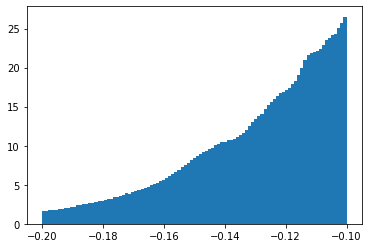

In [17]:
plt.hist(E_ave/1E6, bins=np.linspace(-0.2, -0.1, 100), density=True)
# plt.yscale('log')
# plt.ylim(2, 7)
plt.show()